## A note about proxies

If you are in a corporate environment, you probably connect to the Internet through another computer called a 'proxy'. You will need the URL of this proxy; it might look like `https://proxy.my-company.net:8080`. Then use it in your Python environment like this:

    proxies  = {'https': 'https://proxy.my-company.net:8080'}
    r = requests.get(url, proxies=proxies)
    
Each time you use `requests.get()` you will need to pass the `proxies` dictionary in this way.

----

## Making a query over the web

In [1]:
image_1 = "https://www.spec2000.net/text019/fmi1%20crossbeds.jpg"

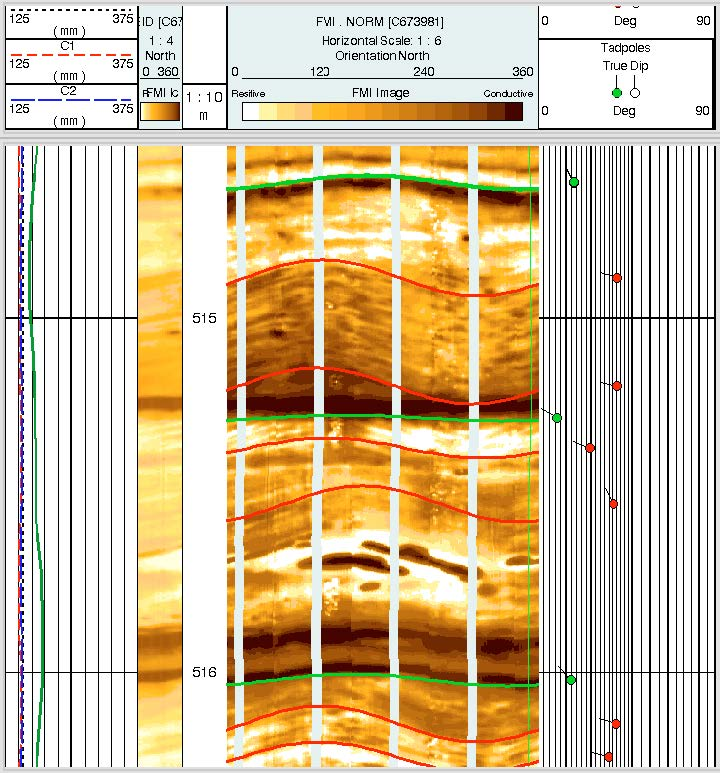

In [2]:
from IPython.display import Image

Image(image_1)

## Send the URL

You can do this as a `GET` request:

In [8]:
import requests

params = {
    'image': image_1,
}

r = requests.get("https://geofignet.geosci.ai/api", params=params)

In [9]:
r.status_code

200

In [10]:
j = r.json()
j['results'][0]['top_class'], j['results'][0]['top_prob']

('fmilog', 1.0)

In [12]:
j

{'job_uuid': '97786d42-611b-11ea-a072-0a89daa00f29',
 'n_requests': 1,
 'results': [{'classes': ['blockdiagram',
    'chronostrat',
    'corephoto',
    'correlation',
    'equation',
    'fieldnote',
    'fmilog',
    'geologicmap',
    'outcrop',
    'photomicrograph',
    'regionalsection',
    'rosediagram',
    'seismic',
    'semicrograph',
    'stereonet',
    'structuremap',
    'synthetic',
    'table',
    'ternary',
    'welllog'],
   'probabilities': [1.6724895936497813e-14,
    3.567907959096256e-13,
    8.106218062249593e-13,
    6.698793415282932e-16,
    3.3022447657479834e-16,
    3.802517586286129e-14,
    1.0,
    9.883883804722576e-14,
    8.132206625493296e-16,
    9.421477592091434e-16,
    2.0524540048213677e-15,
    3.026046481533623e-13,
    6.694115747829521e-13,
    6.9479457214980615e-15,
    6.175905273297921e-12,
    1.912113661850512e-10,
    1.0209304929231777e-10,
    2.853467313238163e-14,
    2.21830753766028e-09,
    1.44282765531141e-13],
   'top_cl

## Send base64-encoded string

You will need to use a `POST` request:

In [13]:
image_2 = "http://virtualoutcrop.com/assets/images/virtualoutcrop.com/LIME/features/Outcrop.png"

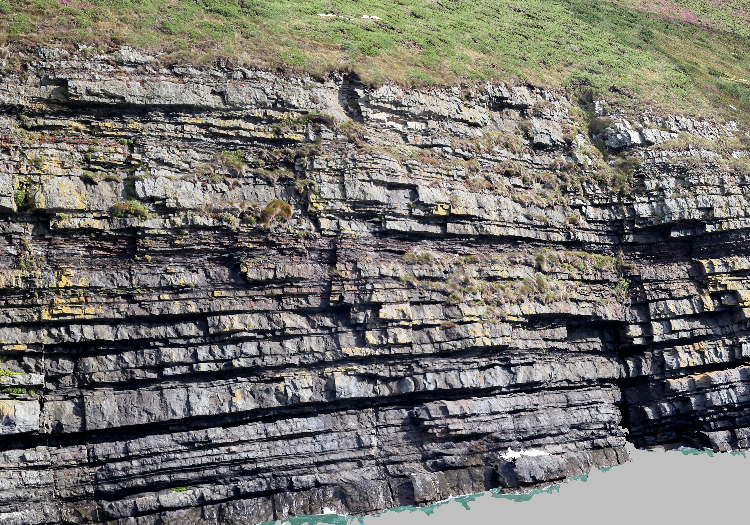

In [14]:
from IPython.display import Image

Image(image_2)

In [15]:
from PIL import Image
from io import BytesIO
import base64
import requests

r = requests.get(image_2)
img = Image.open(BytesIO(r.content))

handle = BytesIO()
img.save(handle, format='png')
handle.seek(0)
img_b64 = base64.b64encode(handle.getvalue()).decode('utf-8')

In [16]:
import requests

json = {
    'requests': [
        {'image': image_1},
        {'image': img_b64},
    ]
}

headers = {'Accept': 'application/json'}


r = requests.post("https://geofignet.geosci.ai/api", json=json, headers=headers)

In [17]:
r.status_code

200

In [18]:
for result in r.json()['results']:
    print(f"Prediction: {result['top_class']}, p = {result['top_prob']:0.4f}")

Prediction: fmilog, p = 1.0000
Prediction: outcrop, p = 0.6330
